# 퍼셉트론

## #01. 퍼셉트론의 이해
- 인공신경망(딥러닝)이 기원이 되는 알고리즘
- 하나 이상의 신호를 입력받아 어떠한 계산을 수행한 후 하나의 Output를 출력한다.
- 퍼셉트론은 1과 0의 신호만 가질 수 있다. (*뉴런 인공신공망과 차이점)
- 신호가 흐르면 `1`, 흐르지 않으면 `0` 이다. (true + true = True / tru + false = False / false + false = False)

### 1. input이 2개인 퍼셉트론
- $x_1$ 과 $x_2$ 는 입력신호, $y$ 는 출력신호, $w_1$ 과 $w_2$ 는 가중치를 의미한다.($w$ : weight)
- **$x$ 와 가중치$ w $ 를 모두 곱한 값을 모두 더하여 하나의 값($y$)로 만들어낸다.**
- 입력신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값($y$)이 어떠한 임계값을 넘을 때만 1로 출력한다.
- 신경망에서 만들어진 값($y$)을 적절한 출력값으로 변환해주는 함수를 `활성화함수`라고 한다.
- 입력 신호와 출력 신호를 담고 있는 원은 노드 혹은 뉴런이라고 부른다.

![퍼셉트론](./res/per.png)

y를 수식으로 나타내기
![퍼셉트론](./res/퍼셉트론수식.png)

### 2. 논리회로
- 논리 연산을 통해 전기 장치를 제어하는 통로.
- 컴퓨터 및 기타 전기 장치를 작동하게 만드는 기본 부품
- 불 대수를 이용하여 설계
- 여러 입력을 해도 1개의 출력만 나온다.

![논리회로](./res/logic.png)

### 3. 게이트
- 논리회로의 기초 구성요소
- 각 게이트는 논리 연산 하나를 구현한다.

![게이트](./res/gate.jpg)

게이트의 종류

![게이트의 종류](./res/gate2.png)

퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다.

## #02. 퍼셉트론 구현하기

### 1. 패키지 참조하기

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from tensorflow.keras.models import Sequential  #순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       #모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD     #옵티마이저
from tensorflow.keras.losses import mse        #OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

### 2. AND게이트

#### 1) 패키지 참조하기

#### 2) 데이터 셋 준비하기
랜덤시트값 고정

In [2]:
np.random.seed(777)

데이터 셋 구성

In [3]:
train_x = np.array([[0,0],[1,0],[0,1],[1,1]])
train_y = np.array([[0],[0],[0],[1]])

#### 3) 데이터 전처리
간단한 데이터 이므로 이 예제에서는 수행하지 않는다.

#### 4) 탐색적 데이터 분석

In [4]:
# flatten : 무조건 1차원으로 풀어버린다.
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
0,1,0
0,0,1
1,1,1


#### 5) 데이터 셋 분할하기
> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음.

#### 6) 모델 개발

모델정의

In [5]:
 # 객체 생성
model = Sequential()

# 신경망 층을 쌓자. 1+1 = 2층 , 활성화함수 = linear
model.add(Dense(1, input_shape=(2,), activation ='linear'))

# loss = 훈련값을 판단하는 함수(손실함수), metrics = 검증데이터 검증할때 어떤 것을 검증할 것인가?(지금은 훈련데이터만 있기 때문에 훈련데이터의 정확도를 검증)
model.compile(optimizer = SGD(), loss = mse, metrics =['acc'])

# 손실율이 낮아지고 정확도가 높아질 수록 좋음. 
#실제는 100프로 나오지 않음(지금은 데이터가 적어서 그럼. )
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [6]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500


1/1 [==============================] - 0s 260ms/step - loss: 0.7855 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7780 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7706 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7632 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7560 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7489 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7419 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7350 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7281 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7213 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.7147 - acc: 0.5

,loss,acc
epochs,,
1,0.785457,0.5
2,0.777955,0.5
3,0.770552,0.5
4,0.763248,0.5
5,0.756038,0.5
...,...,...
496,0.068822,1.0
497,0.068764,1.0
498,0.068708,1.0


epoch = 500 #근사값이 나올 때 까지 500번 실행

모델 생성 후 학습 epoch = 500, 그 후 다시 학습 epoch = 500 

-> 도합 1000을 반복한 것 -> 정확도가 높아짐.

#### 7) 학습결과 평가
평가결과 시각화

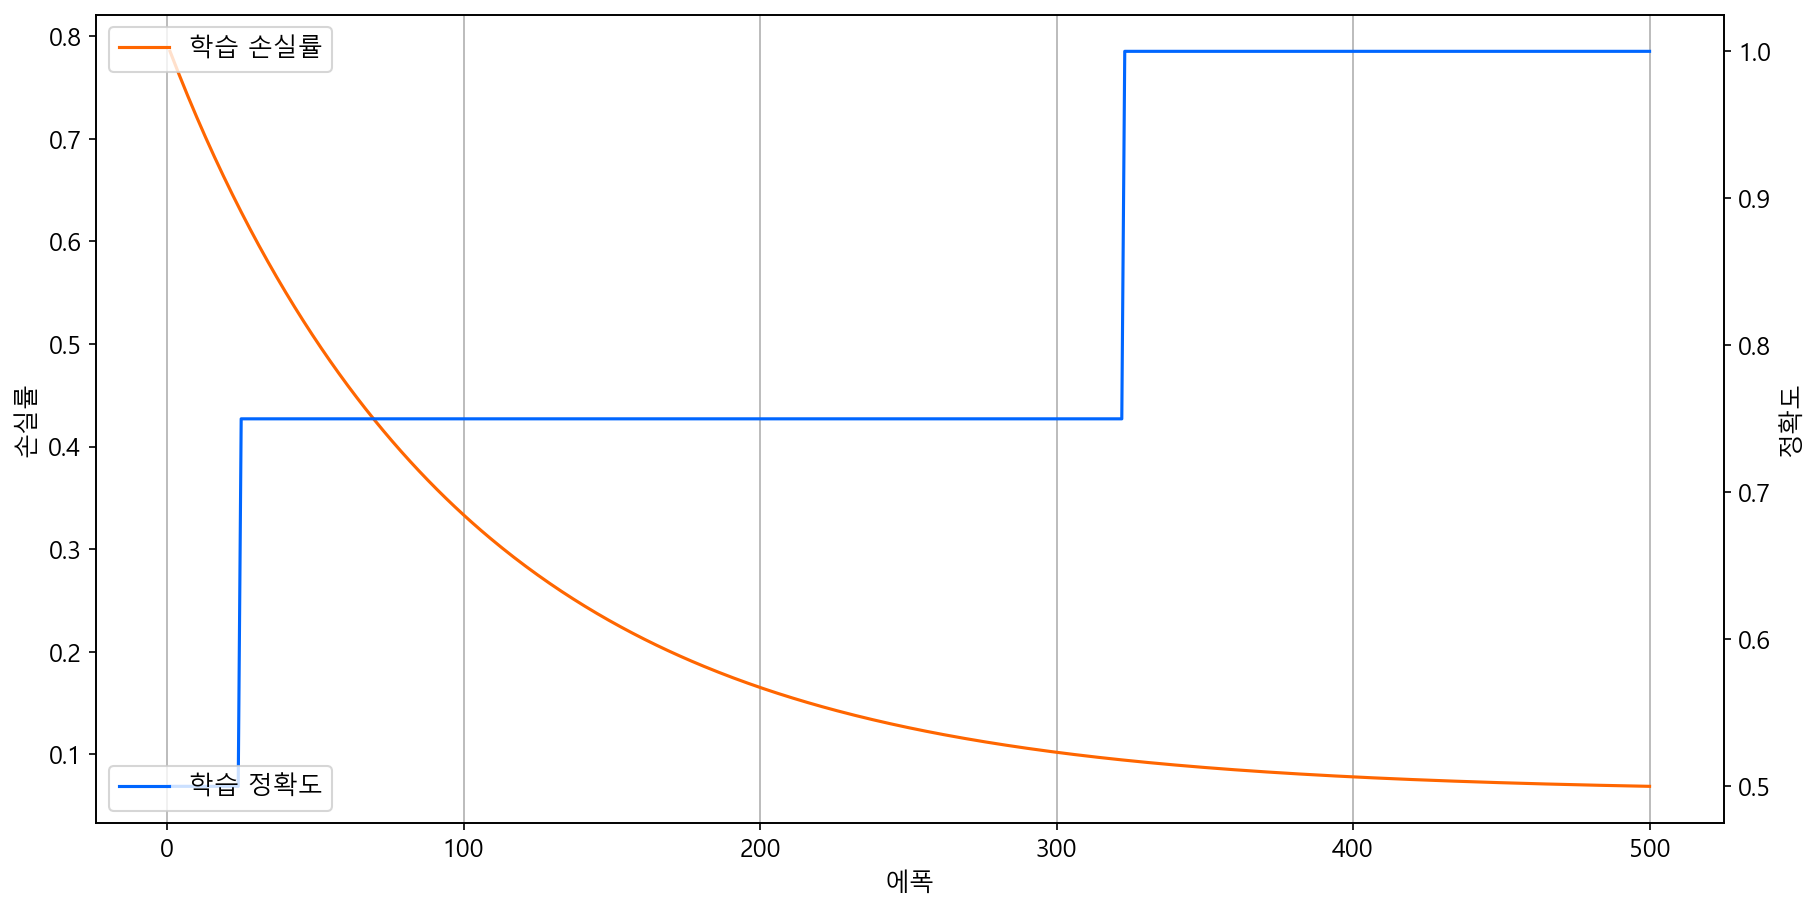

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots(1,1, figsize=(14,7), dpi=150)
ax2 = ax1.twinx()

sb.lineplot(data=result_df, x=result_df.index, y='loss', color = '#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sb.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

> 시각화를 하는 이유   : 정확도가  높아지는 순간을 보기 위해 (한번 높아지면 그 뒤의 값은 상관없기 때문에 = 반복문으로 break 할 시점 확인하기 위해)

모델 성능 평가

In [8]:
ev = model.evaluate(train_x, train_y)
print("손실률 : %0.2f%%, 정확도 : %0.2f%%" % (ev[0], ev[1]))

1/1 [==============================] - 0s 95ms/step - loss: 0.0685 - acc: 1.0000
손실률 : 0.07%, 정확도 : 1.00%


가중치, 편향 확인

In [9]:
weight, bias = model.get_weights()
print("가중치:%s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치:[0.5418359 0.3516106]
편향: [-0.18680628]


#### 8) 학습결과 적용

단일 데이터에 대한 예측치 산정

In [10]:
r00 = model.predict([[0,0]])
r00

1/1 [==============================] - 0s 172ms/step


array([[-0.18680628]], dtype=float32)

In [11]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

학습 데이터 전체를 활용하여 예측값 만들기

In [12]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 20ms/step


array([[-0.18680628],
       [ 0.35502964],
       [ 0.16480432],
       [ 0.70664024]], dtype=float32)

In [13]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


## 3. OR 게이트

### 1) 패키지 설치하기

In [14]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from tensorflow.keras.models import Sequential  #순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       #모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD     #옵티마이저
from tensorflow.keras.losses import mse        #OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

### 2) 데이터 셋 준비하기

랜덤 시드값 고정

In [15]:
np.random.seed(777)

데이터셋 구성

In [16]:
train_x = np.array([[0,0],[1,0],[0,1],[1,1]])
train_y = np.array([[0],[1],[1],[1]])

### 3) 데이터 전처리
> 간단한 데이터 이므로 수행 X

탐색적 데이터 분석

In [17]:
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1','x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
1,1,1


### 4) 데이터 분할하기
> 훈련을 위한 데이터 자체가 워낙 양이 적어서 진행 X

### 5) 모델 개발

모델정의

In [18]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear'))
model.compile(optimizer = SGD(), loss=mse, metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [19]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500


1/1 [==============================] - 0s 210ms/step - loss: 1.2922 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 1.2383 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1875 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1397 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0947 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0523 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0123 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9746 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9391 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9056 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8739 - acc: 0.5

,loss,acc
epochs,,
1,1.292230,0.5
2,1.238305,0.5
3,1.187536,0.5
4,1.139729,0.5
5,1.094700,0.5
...,...,...
496,0.066762,1.0
497,0.066725,1.0
498,0.066688,1.0


### 6) 학습결과 평가

평가 결과 시각화

### 7) 학습결과 적용

In [20]:
# 